# Quantum Computation and Algorithms
## QCAMP 2025 - 06/06/2026
### Lecturer: V Vijendran (Vijey) & Nayanthara Prathap

## Introduction

---

Welcome to **QCAMP 2025: Quantum Computation and Algorithms**! In this workshop, we will cover the foundational principles of quantum computing and show you how to implement and analyze quantum circuits using Python (Qiskit) and our custom utilities. This Jupyter notebook complements the lecture series by QCAMP and provides hands-on exercises to reinforce each concept.

In this notebook, you will learn:

- **State preparation & notation:** How to describe single- and multi-qubit states and compose systems via the tensor product.  
- **Circuit construction:** How to build and interpret quantum circuits with gates such as H, X, Z, CNOT, Toffoli, and phase-kickback operations.  
- **Entanglement:** How to generate and verify Bell and GHZ states.  
- **Quantum parallelism & oracles:** How to exploit superposition to evaluate simple oracles.  
- **Algorithms:** How to implement and test Deutsch’s algorithm and the Deutsch–Jozsa algorithm in Qiskit.

This notebook assumes a working knowledge of linear algebra and basic Python. Let’s dive in!

## Refresher

### Qubit State Descriptions

---

A qubit is a two-level quantum system that can exist in a superposition of states $|0\rangle$ and $|1\rangle$, represented as complex vectors. The state of a qubit is typically expressed in the computational basis $(|0\rangle,|1\rangle)$ or the Hadamard basis $(|+\rangle,|-\rangle)$, with amplitudes satisfying $|\alpha|^2+|\beta|^2=1$ for $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$. For multi-qubit systems, states are combined using the tensor product, which constructs higher-dimensional states from individual qubit states.

### Single and Two-Qubit States

---

The following table lists the standard single-qubit and two-qubit basis states in both ket notation and their explicit vector representations. For two qubits, the basis states are formed by taking the tensor product of single-qubit states.

| Single State | Ket                   | Vector                               | Two-Qubit State | Ket                   | Vector                                       |
|:------------:|:---------------------:|:------------------------------------:|:---------------:|:---------------------:|:---------------------------------------------:|
| 0         | $|0\rangle$    | $\begin{pmatrix}1 \\ 0\end{pmatrix}$              | 00              | $|00\rangle$   | $\begin{pmatrix}1 \\ 0 \\ 0 \\ 0\end{pmatrix}$    |
| 1          | $|1\rangle$     | $\begin{pmatrix}0 \\ 1\end{pmatrix}$              | 01              | $|01\rangle$   | $\begin{pmatrix}0 \\ 1 \\ 0 \\ 0\end{pmatrix}$     |
| +         | $|+\rangle$    | $\displaystyle \frac{1}{\sqrt2}\begin{pmatrix}1 \\ 1\end{pmatrix}$ | 10              | $|10\rangle$   | $\begin{pmatrix}0 \\ 0 \\ 1 \\ 0\end{pmatrix}$    |
| -        | $|-\rangle$    | $\displaystyle \frac{1}{\sqrt2}\begin{pmatrix}1 \\ -1\end{pmatrix}$ | 11              | $|11\rangle$   | $\begin{pmatrix}0 \\ 0 \\ 0 \\ 1\end{pmatrix}$    |


Additional two-qubit states include:

|  |  |  |  |  |
|:---:|:---:|:---:|:---:|:---:|
| **$|++\rangle$** = $\frac12[1,\,1,\,1,\,1]^T$ | **$|--\rangle$** = $\frac12[1,\,-1,\,-1,\,1]^T$ | **$|0+\rangle$** = $\tfrac1{\sqrt2}[1,\,1,\,0,\,0]^T$ | **$|0-\rangle$** = $\tfrac1{\sqrt2}[1,\,-1,\,0,\,0]^T$ | **$|1+\rangle$** = $\tfrac1{\sqrt2}[0,\,1,\,0,\,1]^T$ |
| **$|1-\rangle$** = $\tfrac1{\sqrt2}[0,\,0,\,1,\,-1]^T$ | **$|+0\rangle$** = $\tfrac1{\sqrt2}[1,\,0,\,1,\,0]^T$ | **$|-0\rangle$** = $\tfrac1{\sqrt2}[1,\,0,\,-1,\,0]^T$ | **$|+1\rangle$** = $\tfrac1{\sqrt2}[0,\,1,\,0,\,1]^T$ | **$|-1\rangle$** = $\tfrac1{\sqrt2}[0,\,1,\,0,\,-1]^T$ |

### The Tensor (Kronecker) Product

---

The **tensor product** $\otimes$ combines two state‐vectors (or matrices) into a larger one.  For column‐vectors $a=(a_1,a_2)^T$ and $b=(b_1,b_2)^T$:

$$
a \otimes b
= \begin{pmatrix}a_1\,b \\[6pt] a_2\,b\end{pmatrix}
= \begin{pmatrix}
a_1\,b_1 \\ a_1\,b_2 \\ a_2\,b_1 \\ a_2\,b_2
\end{pmatrix}.
$$

**Example:**  
$$
|0\rangle\otimes|1\rangle
= \begin{pmatrix}1\\0\end{pmatrix}\otimes\begin{pmatrix}0\\1\end{pmatrix}
= \begin{pmatrix}1\cdot0 \\ 1\cdot1 \\ 0\cdot0 \\ 0\cdot1\end{pmatrix}
= \begin{pmatrix}0\\1\\0\\0\end{pmatrix}
= |01\rangle.
$$

### Using `apply_unitaries` and `tensor` in `utils.py`

---

To simplify quantum state transformations, I’ve provided functions in `utils.py`:

- `apply_unitaries(initial_vec, unitaries):` Applies a sequence of unitary matrices to an initial state, displaying each step in LaTeX. This helps you see the state evolution step-by-step.

- `tensor(a, b)`: Computes the Kronecker product of two matrices or vectors, ideal for building multi-qubit states.

Pre-defined states (`zero`, `one`, `plus`, `minus`) and gates (`X`, `Y`, `Z`, `H`, `S`, `CNOT`, `Toffoli`) are also available for use.

The following example demonstrates the use of the above mentioned functions:
```python

from utils import tensor, apply_unitaries, H, CNOT, zero, eye
init_state = tensor(zero, zero)  # |00⟩
gate_one = tensor(H, eye(2))     # H on first qubit, identity on second
gate_two = CNOT                 # CNOT across both qubits
apply_unitaries(init_state, [gate_one, gate_two])
```
This produces a Bell state $\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$, with intermediate steps displayed.

## Quantum Gates

---

Quantum gates are the building blocks of quantum circuits, transforming qubits to create superposition, entanglement, and more through unitary operations (plus measurement). Here’s a quick reference for common gates in Qiskit, perfect for building circuits!

| Gate                          | Icon                                                      | Matrix                                            | Qiskit Command            | Description                                                                                                                  |
|:-----------------------------:|:---------------------------------------------------------:|:-------------------------------------------------:|:-------------------------:|:----------------------------------------------------------------------------------------------------------------------------:|
| **Hadamard (H)**              | <img src="figures/h_gate.png" alt="H" width="60"/>        | $$\frac{1}{\sqrt2}\begin{pmatrix}1 & 1\\[6pt]1 & -1\end{pmatrix}$$          | `qc.h(qubit)`             | Creates an equal superposition of $|0\rangle$ and $|1\rangle$. Crucial for generating interference in quantum algorithms.                |
| **Pauli-X (X)**               | <img src="figures/x_gate.png" alt="X" width="60"/>        | $$\begin{pmatrix}0 & 1\\[4pt]1 & 0\end{pmatrix}$$                         | `qc.x(qubit)`             | Acts like a classical NOT: flips $|0\rangle$↔$|1\rangle$. Used to prepare or correct bit-flip errors.                                     |
| **Pauli-Y (Y)**               | <img src="figures/y_gate.png" alt="Y" width="60"/>        | $$\begin{pmatrix}0 & -i\\[4pt]i & 0\end{pmatrix}$$                        | `qc.y(qubit)`             | Combines bit-flip with a phase of $\pm i$. Useful in more advanced error-correction and certain entangling protocols.            |
| **Pauli-Z (Z)**               | <img src="figures/z_gate.png" alt="Z" width="60"/>        | $$\begin{pmatrix}1 & 0\\[4pt]0 & -1\end{pmatrix}$$                        | `qc.z(qubit)`             | Leaves $|0\rangle$ unchanged, flips the phase of $|1\rangle$. Fundamental for phase-kickback and phase estimation routines.               |
| **Phase (S)**                 | <img src="figures/s_gate.png" alt="S" width="60"/>        | $$\begin{pmatrix}1 & 0\\[4pt]0 & i\end{pmatrix}$$                         | `qc.s(qubit)`             | Applies a $\pi/2$ rotation around $Z$: leaves $|0\rangle$ unchanged, multiplies $|1\rangle$ by $i$. Used in phase kick-back and T-gate construction. |
| **Phase† (S†)**               | <img src="figures/sdg_gate.png" alt="S†" width="60"/>      | $$\begin{pmatrix}1 & 0\\[4pt]0 & -i\end{pmatrix}$$                        | `qc.sdg(qubit)`           | The inverse of $S$: applies a $–\pi/2$ $Z$-rotation. Useful for undoing phase rotations.                                           |
| **CNOT**                      | <img src="figures/cnot_gate.png" alt="CNOT" width="60"/>   | $$\begin{pmatrix}1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{pmatrix}$$        | `qc.cx(ctrl, target)`     | Flips the target qubit if control = $|1\rangle$. Primary 2-qubit entangling gate; builds Bell states and controlled operations.   |
| **Toffoli (CCX)**             | <img src="figures/toffoli_gate.png" alt="Toffoli" width="60"/> | $$\begin{pmatrix}
1&0&0&0&0&0&0&0\\
0&1&0&0&0&0&0&0\\
0&0&1&0&0&0&0&0\\
0&0&0&1&0&0&0&0\\
0&0&0&0&1&0&0&0\\
0&0&0&0&0&1&0&0\\
0&0&0&0&0&0&0&1\\
0&0&0&0&0&0&1&0
\end{pmatrix}$$ | `qc.ccx(ctrl1, ctrl2, target)` | Three-qubit controlled-NOT: flips target only when both controls are $|1\rangle$. Universal for reversible classical computation. |
| **Measurement**               | <img src="figures/measurement_gate.png" alt="Measure" width="60"/> | — (non-unitary projector)                                            | `qc.measure(qubit, cbit)` | Collapses a qubit probabilistically into $|0\rangle$ or $|1\rangle$, storing the result in a classical bit. Essential final step.        |

# Quantum Circuit Model

---

Quantum circuits represent the foundational framework for quantum computation, serving as the standard model analogous to classical circuits or Turing machines. In this paradigm, information is encoded in qubits (quantum bits), which are two-level quantum systems capable of existing in superpositions of states $|0\rangle$ and $|1\rangle$, as well as entangled states. These qubits are manipulated through a discrete sequence of reversible quantum gates, which are unitary operations that preserve the norm of quantum states. Unlike classical computation, where information is processed sequentially on bits using irreversible gates, quantum circuits leverage the reversible nature of quantum gates to perform parallel computations across all possible states simultaneously, a property enabled by quantum superposition and entanglement. The progression of these operations over "time" is referred to as the circuit depth, which quantifies the number of sequential gate layers and provides a measure of computational complexity. This model underpins the design of quantum algorithms, such as Shor’s algorithm for factoring or Grover’s search algorithm, and is essential for understanding quantum information processing.
<figure style="text-align: center; margin: 1.5em 0;">
  <img src="figures/example_circuit.png" alt="Four-qubit circuit example" width="600"/>
  <figcaption><b>Figure 1:</b> A four-qubit quantum circuit illustrating single-qubit gates (H, X, Y, Z), multi-qubit operations (CNOT, Toffoli, MCX) and measurements.</figcaption>
</figure>

---

## How to Read a Quantum Circuit

To effectively interpret and analyze quantum circuits, it is imperative to understand their structural and operational conventions. The following guidelines provide a detailed methodology:

1. **Wires & Registers**  
   - **Quantum wires** (denoted as $q_0$, $q_1$, $q_2$, $q_3, \dots$) represent the quantum registers that carry the qubit states, serving as the primary conduits for quantum information throughout the circuit.  
   - **Classical wires** (denoted as $c_0$, $c_1$, $c_2$, $c_3, \dots$) are associated with classical bits that store the outcomes of quantum measurements, facilitating the interface between quantum and classical systems.

2. **Time Flow:** Quantum gates are applied in a chronological sequence, progressing from **left** to **right across** the circuit diagram. This temporal ordering reflects the step-by-step evolution of the quantum state.

3. **Initial State:** Unless explicitly initialized otherwise (e.g., through a specific gate or operation), all qubits are assumed to begin in the $|0\rangle$ state, establishing a standard starting point for circuit execution.

4. **Qubit Indexing & Bitstrings:** Each qubit $q_i$ is mapped to a corresponding classical bit $c_i$. In the output bitstring, the notation $b_3 b_2 b_1 b_0$ indicates the binary representation, where $b_0$ corresponds to the least significant bit (LSB) associated with $q_0$, andb $b_3$ corresponds to the most significant bit (MSB) associated with $q_3$. This convention is critical for interpreting measurement results.

5. **Circuit Depth:** The circuit depth is defined as the maximum number of sequential gate layers applied to any single qubit, representing the longest path of operations. This metric is a key indicator of the circuit’s time complexity and provides insight into the computational resources required, including the runtime and potential limitations due to decoherence in physical quantum systems.

6. **Measurement:** The measurement operation is denoted by a meter symbol, indicating a projective measurement in the computational ($Z$) basis. This process collapses the quantum state of each measured qubit into either $|0\rangle$ or $|1\rangle$ with probabilities determined by the state's amplitudes, and the resulting classical values are recorded in the corresponding classical bits. Measurements are typically the final step to extract classical information from a quantum computation.



## Qiskit Code Example

---

The following example demonstrates the construction and visualization of a quantum circuit using Qiskit, an open-source framework for quantum computing. This code illustrates the process of creating a circuit, applying quantum gates, and preparing it for measurement, serving as a practical introduction to the concepts discussed above.

```python
# Import the Qiskit library
from qiskit import QuantumCircuit

# 1) Initialize a quantum circuit with 4 qubits and 4 classical bits
qc = QuantumCircuit(4, 4)

# 2) Apply a selection of quantum gates
qc.h([0, 2])        # Apply Hadamard gates to qubits 0 and 2 to create superposition
qc.x(1)             # Apply a Pauli-X gate to qubit 1 to perform a bit flip
qc.cx(0, 1)         # Apply a CNOT gate with qubit 0 as control and qubit 1 as target for entanglement
qc.ccx(0, 1, 2)     # Apply a Toffoli gate with qubits 0 and 1 as controls and qubit 2 as target

# 3) Measure all qubits and map results to classical bits
qc.measure(range(4), range(4))

# 4) Visualize the circuit using Matplotlib
fig = qc.draw(output='mpl', scale=1.2)

## 1. Exploring a Random Single-Qubit State

---

Welcome to your first quantum tutorial! Let’s dive in and observe a randomly generated single-qubit state by running the following cells—no coding required, just exploration!

**Cell 1 - Import Libraries:** Run this cell to import all the necessary libraries and functions for the exercises. You’re all set to begin!

In [1]:
from utils import *

**Cell 2: Generate a Random State:** Run this cell to create a random single-qubit state. Each time you run it, a new state is generated. (You can also uncomment the line to try a uniform superposition state $\displaystyle \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ if you’d like!)

In [2]:
# given α, β (complex) with |α|²+|β|²=1:
alpha, beta = random_qubit_state()
#alpha, beta = np.sqrt(1/2), np.sqrt(1/2)

**Cell 3: Visualize the State:** Run this cell to plot the qubit’s state on the Bloch sphere using `plot_single_qubit_bloch`. Observe where the state vector points—how does it look?

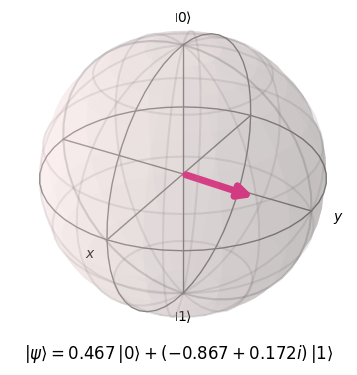

In [3]:
qc = QuantumCircuit(1)
qc.initialize([alpha, beta], 0)
plot_single_qubit_bloch(qc)

**Cell 4: Build and Visualize the Circuit:** Run this cell to construct a quantum circuit that measures the qubit and visualize it with .draw('mpl'). Notice how the circuit is set up for measurement.

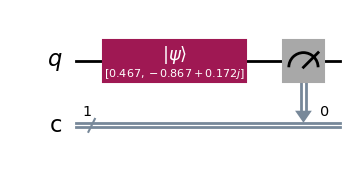

In [4]:
qc_measure = QuantumCircuit(1, 1)
qc_measure.initialize([alpha, beta], 0)
qc_measure.measure(0, 0)
qc_measure.draw("mpl")

**Cell 5: Measure and Explore Shots:** Run this cell to measure the qubit and plot the binary outcomes using `simulate_circuit` and `plot_binary_histogram`. The default number of shots is set to $10000$. After observing the results, change the number of shots (e.g., try $100$, $1000$, $50000$) and rerun the cell. How do the counts change? Why do they vary more drastically with fewer shots and less with more shots? Can you explain this behavior?

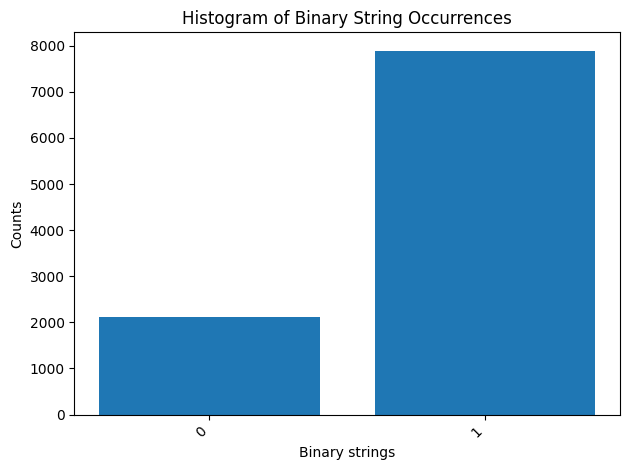

In [5]:
measurement_outcomes = simulate_circuit(qc_measure, 10000)
plot_binary_histogram(measurement_outcomes)

## 2. Single Qubit Gates

---

#### Exercise 1: Discovering the $|+\rangle$ State

Let's figure out how to create the $|+\rangle$ state, which looks like $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ on the Bloch sphere! Start by building a single-qubit quantum circuit using `QuantumCircuit(1)`. Experiment with different gates to transform the initial $|0\rangle$ state into $|+\rangle$, then use `plot_single_qubit_bloch(qc)` from `utils.py` to visualize the result. Next, use `apply_unitaries` to compute the math: start with the initial state $|0\rangle$ (which is defined as `zero` in `utils.py`) and apply the gates you chose, checking how the state changes. Can you explain why your chosen gates lead to the $|+\rangle$ state by looking at the math?

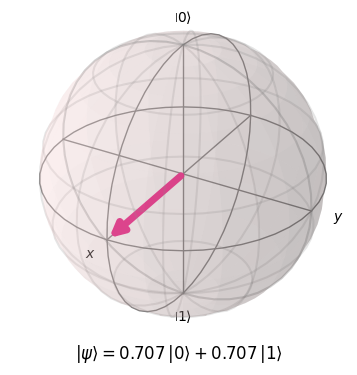

In [6]:
qc = QuantumCircuit(1)
qc.h(0)
plot_single_qubit_bloch(qc)

In [7]:
apply_unitaries(zero, [H])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Exercise 2: Discovering the $|-\rangle$ State

Now let's determine how to create the $|-\rangle$ state, which is $\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$ on the Bloch sphere! Construct a single-qubit quantum circuit using `QuantumCircuit(1)`. Try different combinations of gates to transform the initial $|0\rangle$ state into $|-\rangle$, then visualize the result with `plot_single_qubit_bloch(qc)` from `utils.py`. Use `apply_unitaries` to work out the math: begin with $|0\rangle$ (vector $[1,0]$) and apply your selected gates, observing the state change. Can you explain why your gate combination produces the $|-\rangle$ state based on the math?

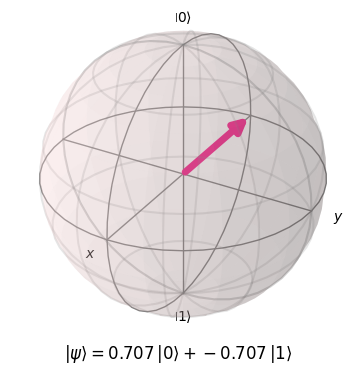

In [8]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
plot_single_qubit_bloch(qc)

In [9]:
apply_unitaries(zero, [X, H])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Exercise 3: Distinguishing $|+\rangle$ and $|-\rangle$ States

Let's figure out how to verify if a qubit is in the $|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ or $|-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$ state! You'll work in three cells for each state.

**Cell 1 - Quantum Circuit Setup:** Modify the code below to add the correct gate that transforms the initialized state into the measured basis. The answer is missing-experiment to find it!

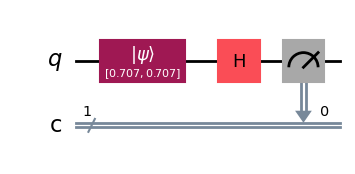

In [10]:
## Code for Quantum Circuit in Plus State
qc_plus = QuantumCircuit(1, 1)
qc_plus.initialize([np.sqrt(1/2), np.sqrt(1/2)], 0)
# Add the correct gate here

qc_plus.h(0) # This is the answer we are looking for. Measure in the Hadamard Basis

qc_plus.measure(0, 0)
qc_plus.draw('mpl')

**Cell 2 - Measure and Analyze:** Run this code to see the measurement results. Use the histogram to determine if the state is $|+\rangle$ (expect mostly 0s) or $|-\rangle$ (expect mostly 1s). The functions `simulate_circuit` and `plot_binary_histogram` from `utils.py` will help you!

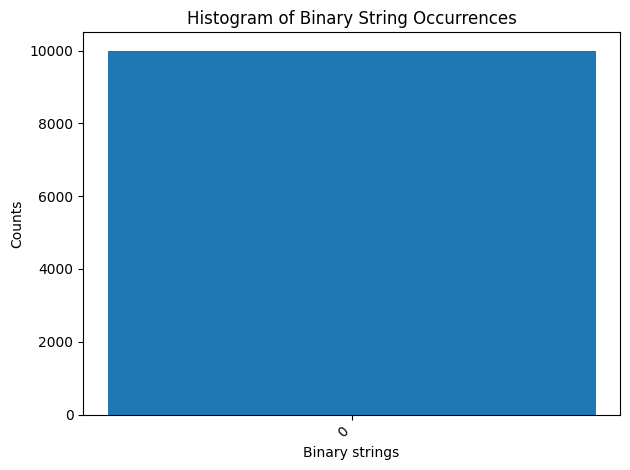

In [11]:
measurement_outcomes = simulate_circuit(qc_plus, 10000)
plot_binary_histogram(measurement_outcomes)

**Cell 3 - Work Out the Math:** Use `apply_unitaries` with the initial state $|+\rangle$ (defined as `plus` in `utils.py`) and the gate you chose to compute how the state changes. Can you explain why this gate confirms the $|+\rangle$ state?

In [12]:
apply_unitaries(plus, [H])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Cell 1 - Quantum Circuit Setup:** Modify the code below to add the correct gate that transforms the initialized state into the measured basis. The answer is missing-experiment to find it!

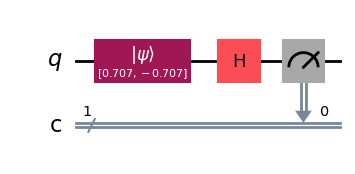

In [13]:
##Code for Quantum Circuit in Minus State
qc_minus = QuantumCircuit(1, 1)
qc_minus.initialize([np.sqrt(1/2), -np.sqrt(1/2)], 0)
# Add the correct gate here

qc_minus.h(0) # This is the answer we are looking for. Measure in the Hadamard Basis

qc_minus.measure(0, 0)
qc_minus.draw('mpl')

**Cell 2 - Measure and Analyze:** Run this code to see the measurement results. Use the histogram to determine if the state is $|+\rangle$ (expect mostly 0s) or $|-\rangle$ (expect mostly 1s). The functions `simulate_circuit` and `plot_binary_histogram` from `utils.py` will help you!

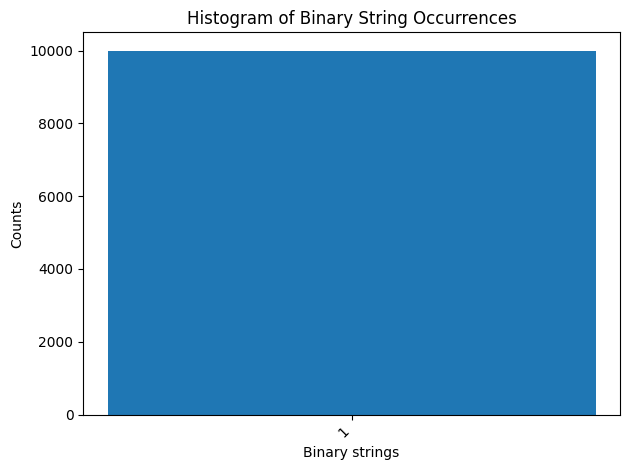

In [14]:
measurement_outcomes = simulate_circuit(qc_minus, 10000)
plot_binary_histogram(measurement_outcomes)

**Cell 3 - Work Out the Math:** Use `apply_unitaries` with the initial state $|-\rangle$ (defined as `minus` in `utils.py`) and the gate you chose to compute how the state changes. Can you explain why this gate confirms the $|-\rangle$ state?

In [15]:
apply_unitaries(minus, [H])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Exercise 4: Discovering the $\frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle)$ State

Let's construct the $\frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle)$ state on the Bloch sphere! Build a single-qubit quantum circuit with `QuantumCircuit(1)`. Try different gates to transform $|0\rangle$ into this state, then use `plot_single_qubit_bloch(qc)` to visualize it. Next, use `apply_unitaries` to compute the math with $|0\rangle$ (vector $[1,0]$) and your chosen gates, observing the state change. Can you explain why your gates produce this state?

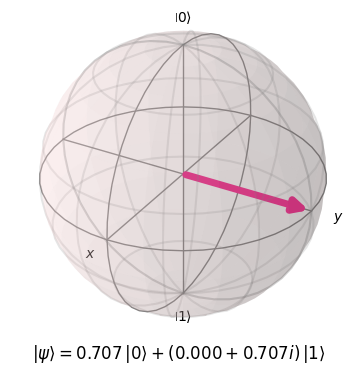

In [16]:
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)
plot_single_qubit_bloch(qc)

In [17]:
apply_unitaries(zero, [H, S])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Exercise 5: Discovering the $\frac{1}{\sqrt{2}}(|0\rangle-i|1\rangle)$ State

Let's construct the $\frac{1}{\sqrt{2}}(|0\rangle-i|1\rangle)$ state on the Bloch sphere! Build a single-qubit quantum circuit with `QuantumCircuit(1)`. Try different gates to transform $|0\rangle$ into this state, then use `plot_single_qubit_bloch(qc)` to visualize it. Next, use `apply_unitaries` to compute the math with $|0\rangle$ (vector $[1,0]$) and your chosen gates, observing the state change. Can you explain why your gates produce this state?

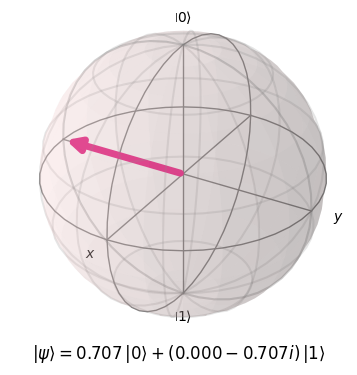

In [18]:
# Note: There might exist multple answers for this
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)
qc.z(0)
plot_single_qubit_bloch(qc)

In [19]:
apply_unitaries(zero, [H, S, Z])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [20]:
apply_unitaries(zero, [X, H, S])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Exercise 6: Distinguishing $\displaystyle \frac{1}{\sqrt{2}}\left(|0\rangle + i|1\rangle \right)$ and $\displaystyle \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle \right)$ States

Let's figure out how to verify if a qubit is in the $\displaystyle \frac{1}{\sqrt{2}}\left(|0\rangle + i|1\rangle \right)$ or $\displaystyle \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle \right)$ state! You'll work in three cells for each state.

**Cell 1 - Quantum Circuit Setup:** Modify the code below to add the correct gate that transforms the initialized state into the measured basis. The answer is missing-experiment to find it!

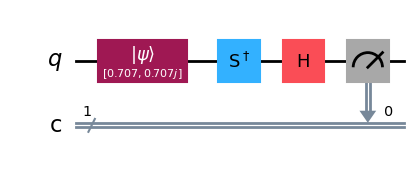

In [21]:
## Code for Quantum Circuit in Plus i State
qc_plusi = QuantumCircuit(1, 1)
qc_plusi.initialize([np.sqrt(1/2), np.sqrt(1/2) * 1j], 0)

# Add the correct gates here
qc_plusi.sdg(0) # This is the answer we are looking for. Apply the inverse of the phase gate.
qc_plusi.h(0) # Then measure in the Hadamard Basis

qc_plusi.measure(0, 0)
qc_plusi.draw('mpl')

**Cell 2 - Measure and Analyze:** Run this code to see the measurement results. Use the histogram to determine if the state is $\frac{1}{\sqrt{2}}\left(|0\rangle + i|1\rangle \right)$ (expect mostly 0s) or $\frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle \right)$ (expect mostly 1s). The functions `simulate_circuit` and `plot_binary_histogram` from `utils.py` will help you!

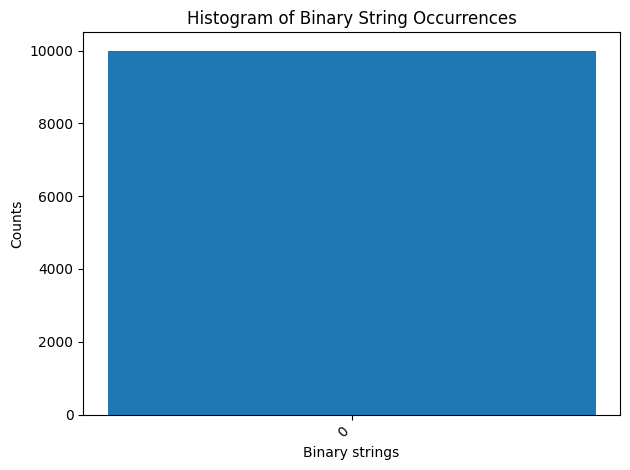

In [22]:
measurement_outcomes = simulate_circuit(qc_plusi, 10000)
plot_binary_histogram(measurement_outcomes)

**Cell 3 - Work Out the Math:** Use `apply_unitaries` with the initial state $\frac{1}{\sqrt{2}}\left(|0\rangle + i|1\rangle \right)$ (defined as `psi_plus_i` in the cell below) and the gate you chose to compute how the state changes. Can you explain why this gate confirms the state?

In [23]:
psi_plus_i  = 1/sqrt(2) * (zero +  I*one)   # (|0> + i|1>)/√2
apply_unitaries(psi_plus_i, [S.inv(), H])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [24]:
apply_unitaries(psi_plus_i, [S, S, S, H])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Cell 1 - Quantum Circuit Setup:** Modify the code below to add the correct gate that transforms the initialized state into the measured basis. The answer is missing-experiment to find it!

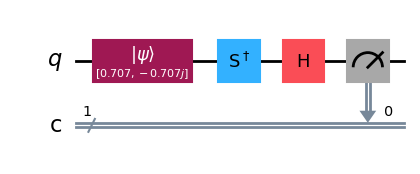

In [25]:
## Code for Quantum Circuit in Minus i State
qc_minusi = QuantumCircuit(1, 1)
qc_minusi.initialize([np.sqrt(1/2), -np.sqrt(1/2) * 1j], 0)

qc_minusi.sdg(0) # This is the answer we are looking for. Apply the inverse of the phase gate.
qc_minusi.h(0) # Then measure in the Hadamard Basis

qc_minusi.measure(0, 0)
qc_minusi.draw('mpl')

**Cell 2 - Measure and Analyze:** Run this code to see the measurement results. Use the histogram to determine if the state is $\frac{1}{\sqrt{2}}\left(|0\rangle + i|1\rangle \right)$ (expect mostly 0s) or $\frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle \right)$ (expect mostly 1s). The functions `simulate_circuit` and `plot_binary_histogram` from `utils.py` will help you!

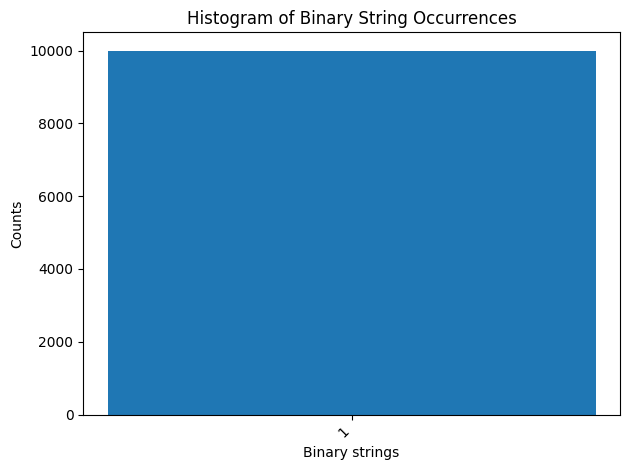

In [26]:
measurement_outcomes = simulate_circuit(qc_minusi, 10000)
plot_binary_histogram(measurement_outcomes)

**Cell 3 - Work Out the Math:** Use `apply_unitaries` with the initial state $\frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle \right)$ (defined as `psi_minus_i` in the cell below) and the gate you chose to compute how the state changes. Can you explain why this gate confirms the state?

In [27]:
psi_minus_i = 1/sqrt(2) * ( zero -  I*one )   # (|0> − i|1>)/√2
apply_unitaries(psi_minus_i, [S.inv(), H])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
apply_unitaries(psi_minus_i, [S, S, S, H])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Exercise 7: Creating a Four-Way Superposition State

Let's experiment to create the state $\displaystyle |\psi\rangle=\frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$ with two qubits! 

Build a two-qubit quantum circuit using `QuantumCircuit(2,2)`. Try different gates starting from $|00\rangle$ to achieve this equal superposition, then visualize your circuit with `.draw('mpl')`. In the next cell, measure both qubits and plot the outcomes using `simulate_circuit` and `plot_binary_histogram` from `utils.py`. Check if the histogram shows roughly equal counts for $00$, $01$, $10$, and $11$ to confirm your state!

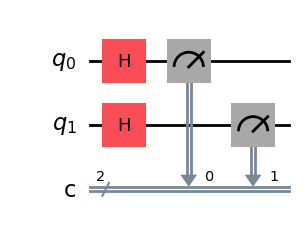

In [29]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.h(1)
qc.measure(0,0)      
qc.measure(1,1)  
qc.draw("mpl")

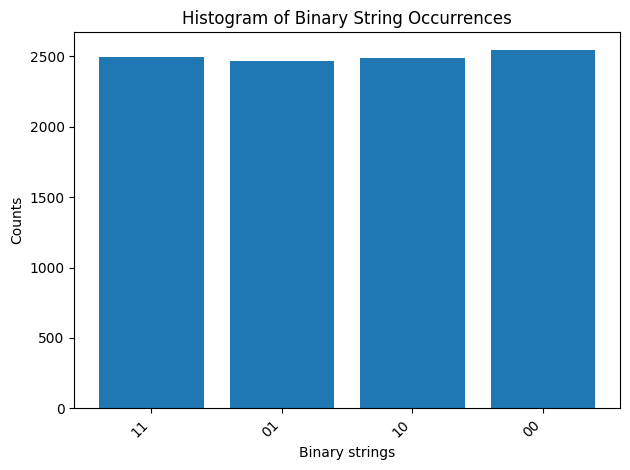

In [30]:
measurement_results = simulate_circuit(qc, 10000)
plot_binary_histogram(measurement_results)

#### Exercise 8

Let's experiment to create the state $|\psi\rangle=\frac{1}{\sqrt{8}}(|000\rangle+|001\rangle+|010\rangle+|011\rangle+|100\rangle+$ $|101\rangle+|110\rangle+|111\rangle)$ with three qubits! Build a three-qubit quantum circuit using
`QuantumCircuit(3,3)`. Try different gates starting from $|000\rangle$ to achieve this equal superposition, then visualize your circuit with `.draw('mpl')`. In the next cell, measure all three qubits and plot the outcomes using `simulate_circuit` and `plot_binary_histogram` from `utils.py`. Check if the histogram shows roughly equal counts for $000$, $001$, $010$, $011$, $100$, $101$, $110$, and $111$ to confirm your state!

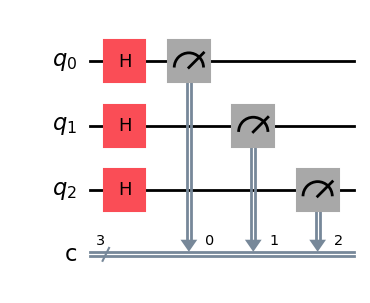

In [31]:
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.measure(0,0)      
qc.measure(1,1)  
qc.measure(2,2)  
qc.draw("mpl")

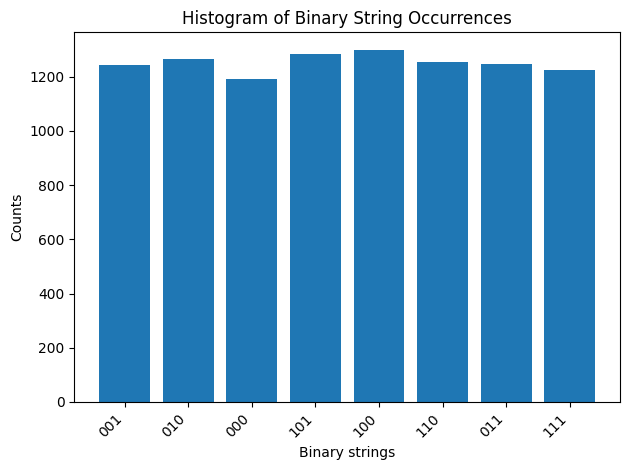

In [32]:
measurement_results = simulate_circuit(qc, 10000)
plot_binary_histogram(measurement_results)

## 2. Multi-Qubit Gates

---

### 2.1. CNOT Gate

#### Exercise 1: Crafting the Bell State $\left|\Phi^{+}\right\rangle$

Let's experiment to create the Bell state $\displaystyle \left|\Phi^{+}\right\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$ with two qubits! 

Build a twoqubit quantum circuit using `QuantumCircuit(2,2)`. Try different gates starting from $|00\rangle$ to achieve this entangled state, then visualize your circuit with `.draw('mpl')`. Next, measure both qubits and plot the outcomes using `simulate_circuit` and `plot_binary_histogram` from `utils.py`, checking for roughly equal counts of $00$ and $11$ with no $01$ or $10$ . Finally, work out the math using `apply_unitaries` with the initial state $|00\rangle$ (build it using `tensor` from `utils.py` to combine vectors) and your gates (use `tensor` for combinining matrices acting on multiple qubits and `eye(2)` for the $2 \times 2$ identity matrix). Can you explain how the math confirms this entangled state?

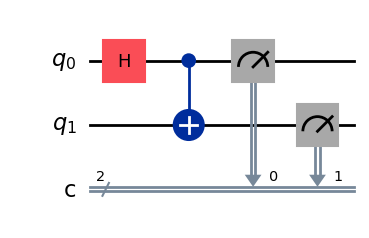

In [33]:
qc = QuantumCircuit(2,2)
qc.h(0)      # Step 1: H on qubit 0
qc.cx(0, 1)  # Step 2: CNOT(0→1)
qc.measure([0,1], [0,1]) # measure to see the 00/11 outcomes
qc.draw("mpl")

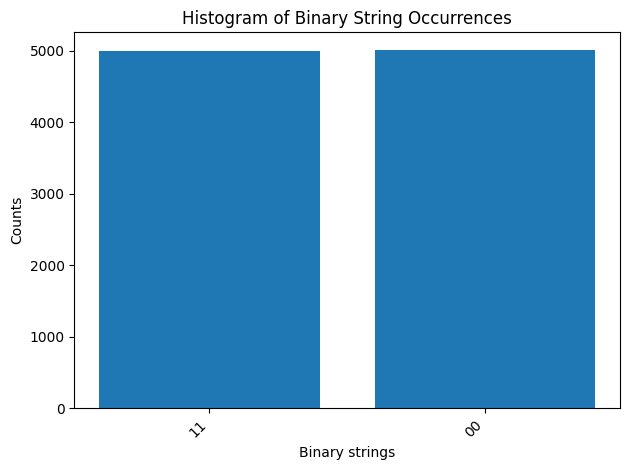

In [34]:
measurement_results = simulate_circuit(qc, 10000)
plot_binary_histogram(measurement_results)

In [35]:
init_state = tensor(zero, zero)
gate_one = tensor(H, eye(2))
gate_two = CNOT
apply_unitaries(init_state, [gate_one, gate_two])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Exercise 2: Crafting the Bell State $\left|\Psi^{+}\right\rangle$

Let's experiment to create the Bell state $\displaystyle \left|\Psi^{+}\right\rangle=\frac{1}{\sqrt{2}}(|01\rangle+|10\rangle)$ with two qubits! 

Build a two-qubit quantum circuit using `QuantumCircuit(2, 2)`. Try different gates starting from $|00\rangle$ to achieve this entangled state, then visualize your circuit with `.draw('mpl')`. Next, measure both qubits and plot the outcomes using `simulate_circuit` and `plot_binary_histogram` from `utils.py`, checking for roughly equal counts of $01$ and $10$ with no $00$ or $11$ . Finally, work out the math using `apply_unitaries` with the initial state $|00\rangle$ and your gates. Can you explain how the math confirms this entangled state?

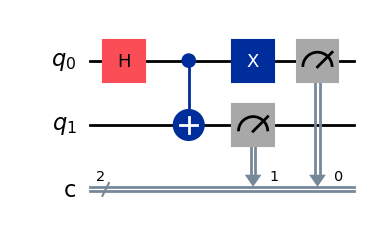

In [36]:
qc = QuantumCircuit(2,2)
qc.h(0)      # Step 1: H on qubit 0
qc.cx(0, 1)  # Step 2: CNOT(0→1)
qc.x(0)
qc.measure([0,1], [0,1]) # measure to see the 00/11 outcomes
qc.draw("mpl")

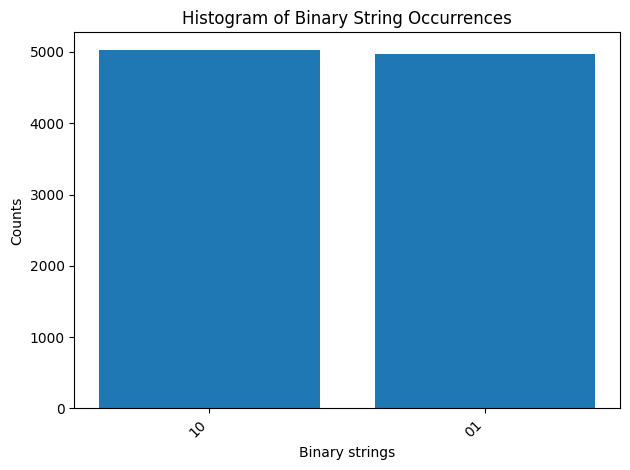

In [37]:
measurement_results = simulate_circuit(qc, 10000)
plot_binary_histogram(measurement_results)

In [38]:
init_state = tensor(zero, zero)
gate_one = tensor(H, eye(2))
gate_two = CNOT
gate_three = tensor(X, eye(2))
apply_unitaries(init_state, [gate_one, gate_two, gate_three])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Exercise 3: Crafting the 3-Qubit GHZ State

Let's experiment to create the 3 -qubit GHZ state $\displaystyle |\psi\rangle=\frac{1}{\sqrt{2}}(|000\rangle+|111\rangle)$ with three qubits! 

Build a three-qubit quantum circuit using `QuantumCircuit(3, 3)`. Try different gates starting from $|000\rangle$ to achieve this entangled state, then visualize your circuit with `.draw('mpl')`. Next, measure all three qubits and plot the outcomes using `simulate_circuit` and `plot_binary_histogram` from `utils.py`, checking for roughly equal counts of $000$ and $111$ with no other outcomes. Can you confirm your state based on the histogram?

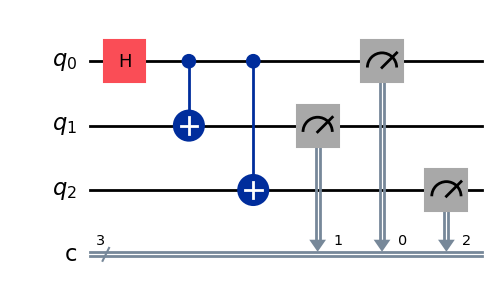

In [39]:
qc = QuantumCircuit(3,3)
qc.h(0)        # superpose qubit 0
qc.cx(0, 1)    # entangle qubit 1 with qubit 0
qc.cx(0, 2)    # entangle qubit 2 with qubit 0

# measure all three to see 000 vs 111
qc.measure([0,1,2], [0,1,2])
qc.draw('mpl')

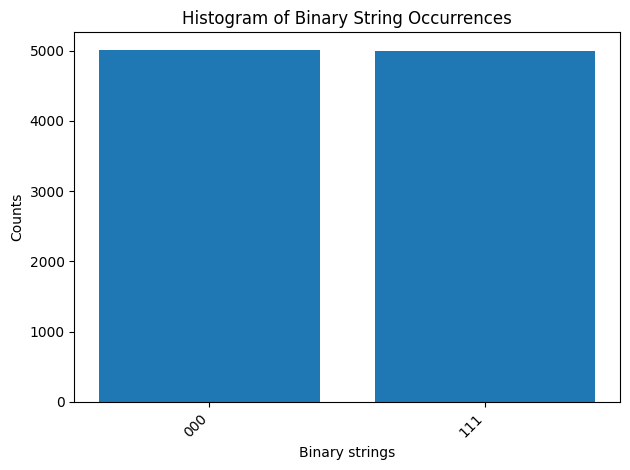

In [40]:
measurement_results = simulate_circuit(qc, 10000)
plot_binary_histogram(measurement_results)

### 2.2. Toffoli Gate

#### Exercise 1: Building a 3-Qubit AND Circuit in Superposition


Let's experiment to create a 3-qubit circuit that transforms $|a, b, 0\rangle \mapsto|a, b, a \wedge b\rangle$ for all $a, b \in$ $\{0,1\}$, testing all inputs at once in superposition! 

Build a three-qubit quantum circuit using `QuantumCircuit(3,3)`. Use gates to put the first two qubits into a superposition of all states $(|00\rangle$, $|01\rangle,|10\rangle,|11\rangle$ ) starting from $|000\rangle$, then add gates to compute the `AND` of the first two qubits into the third, and visualize your circuit with `.draw('mpl')`. Next, measure all three qubits and plot the outcomes using `simulate_circuit` and `plot_binary_histogram` from `utils.py`, checking that the results match the `AND` operation for all inputs (e.g., expect equal counts of $|000\rangle,|010\rangle,|100\rangle$, $|111\rangle$). Finally, work out the math using `apply_unitaries` with the initial state $|000\rangle$ and your gates. Can you explain how the math confirms this transformation for all inputs simultaneously?

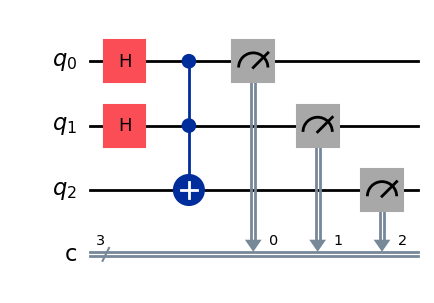

In [41]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.h(1)
qc.ccx(0,1,2)
qc.measure([0,1,2], [0,1,2])
qc.draw('mpl')

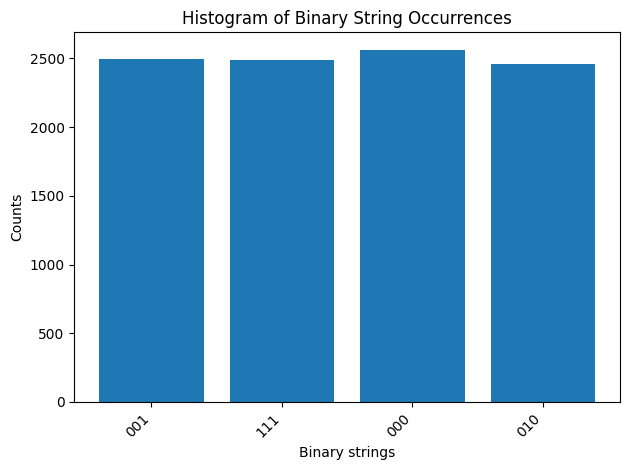

In [42]:
measurement_results = simulate_circuit(qc, 10000)
plot_binary_histogram(measurement_results)

In [43]:
init_state = tensor(tensor(zero, zero), zero)
gate_one = tensor(tensor(H, H), eye(2))
gate_two = Toffoli
apply_unitaries(init_state, [gate_one, gate_two])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 2.3. Phase Kickback

Phase Kickback is a cool trick that only happens in the quantum world! Imagine you have qubits (quantum bits) working together in a circuit. When we apply certain operations, like the one in the circuit below, the phase (a kind of hidden "twist" in a qubit’s state) can "kick back" from one qubit to another without changing their main values. 

<figure style="text-align: center; margin: 1.5em 0;">
  <img src="figures/phase_kickback1.png"/>
  <figcaption style="font-size:0.9em; margin-top:0.5em;">
    <strong>Figure 2.</strong> Phase‐kickback circuit: qubit $q_0$ is initialized in $\lvert0\rangle$ and qubit $q_1$ in $\lvert1\rangle$. Hadamard gates create superpositions and an $X\,H$ on $q_1$ puts it into the $\lvert-\rangle$ state. A CNOT with $q_0$ as control then “kicks” the hidden phase back onto $q_0$ without changing either qubit’s computational value.
  </figcaption>
</figure>

This happens because quantum states can be in superpositions, letting information move in ways classical bits can’t. In quantum algorithms like Deutsch-Jozsa, this trick helps us figure out properties of functions (like if they’re constant or balanced) super fast, using just one step. Classical computers can’t do this because their bits don’t have phases or superpositions, making Phase Kickback a unique quantum advantage!

#### Exercise 1 - Unraveling Phase Kickback by Working Out the Math behind the Circuit

Let's explore the Phase Kickback phenomenon by coding the quantum circuit from the picture! The circuit starts with two qubits in the state $|00\rangle$, applies an $X$ gate to the second qubit, Hadamard gates to both qubits to create the $|+-\rangle$ state (where $|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ and $|-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-$ $|1\rangle)$), and then applies a CNOT gate. Your task is to write code to compute this transformation step by step. In `utils.py`, you have these tools: `zero` for $|0\rangle$, `eye (2)` for the $2 \times 2$ identity matrix, `X` for the $X$ gate, `H` for the Hadamard gate, and `CNOT` for the CNOT gate. You also have the functions `tensor` (to combine gates for two qubits) and `apply_unitaries` (which applies a list of gates to an initial state and shows the state after each step). 

Write code to set up the initial state, apply the gates in order, and use `apply_unitaries` to see the state change from $|00\rangle$ to $|+-\rangle$, and then through the CNOT gate to find the final state. Can you explain how the CNOT gate causes the phase to "kick back" and affect the first qubit's state? 

In [44]:
init_state = tensor(zero, zero)
gate_one = tensor(eye(2), X)
gate_two = tensor(H, H)
gate_three = CNOT
gate_sequence = [gate_one, gate_two, gate_three]
apply_unitaries(init_state, gate_sequence)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [45]:
init_state = tensor(plus, minus)
gates = [CNOT]
apply_unitaries(init_state, gates)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [46]:
final_state = tensor(minus, minus)
show_latex(final_state)

<IPython.core.display.Math object>

#### Exercise 2: Exploring Measurement with Phase Kickback

Let's dive into the quantum circuit from the picture! 

<figure style="text-align: center; margin: 1.5em 0;">
  <img src="figures/phase_kickback2.png"/>
  <figcaption style="font-size:0.9em; margin-top:0.5em;">
    <strong>Figure 3.</strong> Phase-kickback circuit: both qubits start in \(\lvert0\rangle\); apply \(H\) on \(q_0\) and \(X\) then \(H\) on \(q_1\); perform a CNOT with \(q_0\) as control and \(q_1\) as target; apply a final \(H\) on \(q_0\); measure \(q_0\).
  </figcaption>
</figure>


Starting with qubits in $|00\rangle$, the circuit applies an X gate to $q_1$, Hadamard gates to both $q_0$ and $q_1$, and a CNOT gate controlled by $q_0$ with $q_1$ as target, before measuring $q_0$. First, work out the state of the qubits right before measurement step by step, using the tools from `utils.py`: `zero`, `eye(2)`, `X`, `H`, `CNOT`, `tensor`, and `apply_unitaries`. Then, implement the circuit in code, apply the gates, and measure $q_0$ to find the outcome. Next, consider what would happen if the X gate on $q_1$ was removed-what would the measurement result of $q_0$ be in that case? Use your math and code to uncover the role of the X gate in this quantum magic!

In [47]:
init_state = tensor(zero, zero)
gate_one = tensor(eye(2), X)
gate_two = tensor(H, H)
gate_three = CNOT
gate_four = tensor(H, eye(2))
gate_sequence = [gate_one, gate_two, gate_three, gate_four]
apply_unitaries(init_state, gate_sequence)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [48]:
final_state = tensor(one, minus)
show_latex(final_state)

<IPython.core.display.Math object>

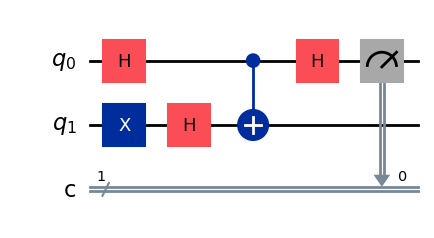

In [49]:
qc = QuantumCircuit(2,1)
qc.x(1)
qc.h([0, 1])
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 0)
qc.draw('mpl')

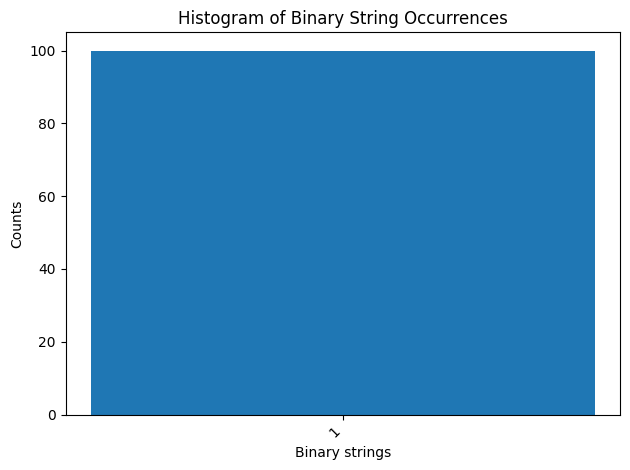

In [50]:
measurement_results = simulate_circuit(qc, 100)
plot_binary_histogram(measurement_results)

# Quantum Algorithms

---

Quantum algorithms represent a transformative approach to computation, harnessing the principles of quantum mechanics—such as superposition, entanglement, and interference—to solve problems more efficiently than classical algorithms in certain domains. Unlike classical algorithms, which process information using bits that are either 0 or 1, quantum algorithms operate on qubits, which can exist in a superposition of states, allowing for parallel computation across exponentially many possibilities. This unique capability enables quantum algorithms to achieve speedups over classical counterparts for specific tasks. Notable examples include Shor’s algorithm, which provides an exponential speedup for factoring large integers (a cornerstone for cryptography), and Grover’s algorithm, which offers a quadratic speedup for unstructured search problems. These algorithms are typically designed within the quantum circuit model, where a sequence of quantum gates manipulates qubits to perform computations, followed by measurements to extract classical results. As quantum computing hardware advances, understanding these algorithms becomes crucial for leveraging their potential in fields like optimization, cryptography, and machine learning.

## Quantum Parallelism

---

Quantum parallelism is a superpower of quantum computers that lets them do many calculations at once. Imagine a function $f(x)$ that takes a bit $x$ (either 0 or 1) and gives a bit as output (0 or 1). A quantum computer can use a special circuit, shown in the image below, to evaluate $f(x)$ for both $x=0$ and $x=1$ at the same time!

<figure style="text-align: center; margin: 1.5em 0;">
  <img src="figures/quantum_parallelism.png" width="30%" />
  <figcaption><strong>Figure 4.</strong> Quantum circuit for evaluating $f(0)$ and $f(1)$ simultaneously. $U_f$ is the quantum circuit which takes inputs like $|x, y\rangle$ to $|x, y \oplus f(x)\rangle$.</figcaption>
</figure>

This is done by putting the input in a "superposition" state, like $(|0\rangle+|1\rangle) / \sqrt{2}$, which is created using a Hadamard gate. After applying the circuit (called $U_f$ ), the quantum computer holds information about both $f(0)$ and $f(1)$ in one go, resulting in the state:
$$
\frac{|0, f(0)\rangle+|1, f(1)\rangle}{\sqrt{2}} .
$$

This ability to handle multiple inputs simultaneously is what makes quantum parallelism so powerful, and it's the key idea behind algorithms like quantum query algorihtms, which we'll explore next.

## Quantum Query Algorithms and Oracles

---

Quantum query algorithms solve problems by querying an oracle-a "magic librarian" that instantly returns $f(x)$ for an input $x$ (a black-box unitary $O|x, b\rangle=|x, b \oplus f(x)\rangle$ )-in superposition. A Hadamard gate creates $\frac{1}{\sqrt{2^n}} \sum_x|x\rangle$, letting the oracle evaluate $f(x)$ for all $x$ simultaneously, yielding $\frac{1}{\sqrt{2^n}} \sum_x|x, f(x)\rangle$. This enables speedups, e.g., Deutsch-Jozsa (one query to check constant vs. balanced) and Grover's $(O(\sqrt{N})$ vs. $O(N)$ searches), using interference to enhance results.

## Deutsch's Algorithm

---

Deutsch's algorithm tackles a special case of the parity problem called Deutsch's problem, where we figure out if a function $f(x)$ - taking a bit $x$ and giving a bit as output - is constant or balanced. A constant function always gives the same output (like 0 or 1 for all inputs), while a balanced function splits outputs evenly (e.g., 0 for one input, 1 for the other). There are four possible functions: 

<div style="text-align: center; margin: 1em 0;">
  <div style="display: inline-flex;">

  <table border="1"
         style="border-collapse: collapse; text-align: center; margin: 0 0.5em;">
    <thead>
      <tr><th>\(a\)</th><th>\(f_1(a)\)</th></tr>
    </thead>
    <tbody>
      <tr><td>0</td><td>0</td></tr>
      <tr><td>1</td><td>0</td></tr>
    </tbody>
  </table>

  <table border="1"
         style="border-collapse: collapse; text-align: center; margin: 0 0.5em;">
    <thead>
      <tr><th>\(a\)</th><th>\(f_2(a)\)</th></tr>
    </thead>
    <tbody>
      <tr><td>0</td><td>0</td></tr>
      <tr><td>1</td><td>1</td></tr>
    </tbody>
  </table>

  <table border="1"
         style="border-collapse: collapse; text-align: center; margin: 0 0.5em;">
    <thead>
      <tr><th>\(a\)</th><th>\(f_3(a)\)</th></tr>
    </thead>
    <tbody>
      <tr><td>0</td><td>1</td></tr>
      <tr><td>1</td><td>0</td></tr>
    </tbody>
  </table>

  <table border="1"
         style="border-collapse: collapse; text-align: center; margin: 0 0.5em;">
    <thead>
      <tr><th>\(a\)</th><th>\(f_4(a)\)</th></tr>
    </thead>
    <tbody>
      <tr><td>0</td><td>1</td></tr>
      <tr><td>1</td><td>1</td></tr>
    </tbody>
  </table>
</div>

</div>


The first and last of these functions are *constant* and the middle two are *balanced*, meaning each output occurs equally often. Deutsch’s problem is to decide which type—constant or balanced—your black-box function is. On a classical computer, this takes two tries, but Deutsch's algorithm uses quantum superposition and phase kickback to do it in one! It starts with qubits in the $\displaystyle |10\rangle$ state, applies a quantum circuit with Hadamard gates and a special $U_f$ operation, and measures the result: 0 means constant, 1 means balanced. The circuit below shows this process, giving quantum computers an edge even with this small step.

<figure style="text-align: center; margin: 1.5em 0;">
  <img src="figures/Deutsch-circuit.png" width="50%" />
  <figcaption><strong>Figure 5.</strong> Deutsch’s algorithm circuit: initialize qubits in \(|0\rangle,|1\rangle\), apply Hadamard gates, run the oracle \(U_f\), apply a final Hadamard on the first qubit, and measure. Outcome 0 ⇒ \(f\) is constant; 1 ⇒ \(f\) is balanced.</figcaption>
</figure>

### Exercise 1: Exploring Deutsch's Oracle

In the file `utils.py`, there's a function called `deutsch_oracle` that helps us test the four functions $f_1, f_2, f_3, f_4$ we learned about earlier. This function takes a 2-qubit quantum circuit and an integer from 1 to 4 (representing which function $f_1$ to $f_4$ to use) and adds the oracle (the $U_f$ operation) to the circuit. Your task is to create a 2-qubit quantum circuit, apply the `deutsch_oracle` for each function (1 to 4), visualize the oracle circuit each time, and check if the oracle correctly matches the behavior of $f_1, f_2, f_3, f_4$ as defined above (e.g., $f_1(0)=0, f_1(1)=0$, and so on). Can you confirm if the oracle works as expected for all four functions?

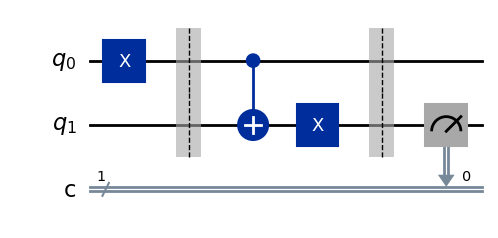

In [51]:
qc = QuantumCircuit(2,1)
qc.x(0)
qc = deutsch_oracle(qc, 3)
qc.measure(1, 0)
qc.draw('mpl')

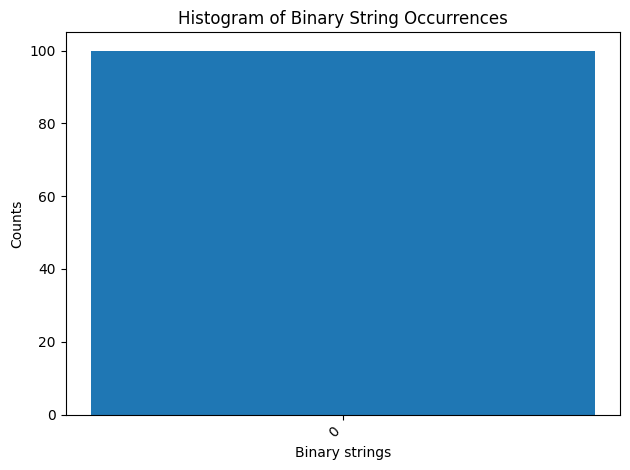

In [52]:
measurement_results = simulate_circuit(qc, 100)
plot_binary_histogram(measurement_results)

### Exercise 2: Building and Testing Deutsch's Algorithm

Using the `deutsch_oracle` function from `utils.py`, your challenge is to implement Deutsch's algorithm step-by-step. Start with a 2-qubit quantum circuit, apply an X gate to the second qubit, then apply Hadamard gates to both qubits to create a superposition (like $(|0\rangle+|1\rangle) / \sqrt{2}$ for the first qubit), add the `deutsch_oracle` for each function $f_1$ to $f_4$, apply another Hadamard gate to the first qubit, and measure the first qubit. Can you verify that your implementation correctly identifies whether each function is constant (output 0) or balanced (output 1), matching the behavior of $f_1, f_2, f_3, f_4$ we explored? Test it out and see if the quantum advantage shines through with just one query!

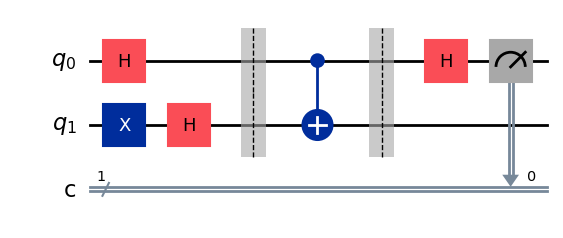

In [53]:
qc = QuantumCircuit(2,1)
qc.h(0)
qc.x(1)
qc.h(1)

qc = deutsch_oracle(qc, 2)

qc.h(0)
qc.measure(0, 0)
qc.draw('mpl')

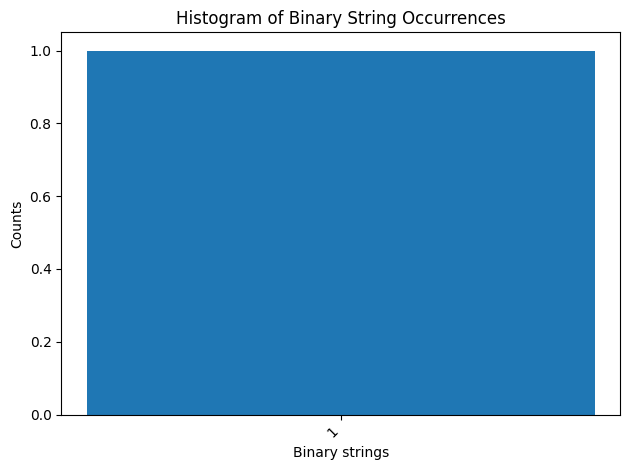

In [54]:
measurement_results = simulate_circuit(qc, 1)
plot_binary_histogram(measurement_results)

## Deutsch-Jozsa Algorithm

---

The Deutsch-Jozsa algorithm takes the Deutsch algorithm we learned earlier and makes it even cooler by handling bigger inputs! Imagine a function $f$ that takes an $n$-bit input (like 00, 01, 10, 11 for $n=2$ ) and outputs 0 or 1. This function is either constant (same output for all inputs, like always 0 or always 1) or balanced (outputs 0 and 1 an equal number of times). Our job is to figure out which one it is with just one query. The Deutsch-Jozsa algorithm does this using a quantum circuit, shown below, that's a lot like the Deutsch circuit. 

<figure style="text-align:center; margin:1.5em 0;">
  <img src="figures/Deutsch-Jozsa.png" width="50%" />
  <figcaption style="font-size:0.9em; margin-top:0.5em;">
    <strong>Figure 6.</strong>  
    Deutsch–Jozsa algorithm circuit: start with an n-qubit register in \(\lvert0\rangle^{\otimes n}\) and an ancilla in \(\lvert1\rangle\), apply Hadamard gates to all \(n+1\) qubits, run the oracle \(U_f\), then apply Hadamard gates again on the first \(n\) qubits and measure them.  
    Getting the all-zero string (\(0^n\)) ⇒ \(f\) is constant; any other outcome ⇒ \(f\) is balanced.
  </figcaption>
</figure>

We start with $n+1$ qubits (all set to $|0\rangle$ except the last one at $|1\rangle$), apply Hadamard gates to create superposition (so we can test all inputs at once), use a special $U_f$ box to apply the function, add more Hadamard gates, and measure the first $n$ qubits (the top ones). If all of them are 0, the function is constant; if any of them is 1, it's balanced. This quantum trick beats classical methods by solving it in one step, showing a bigger quantum advantage!

### Exercise 1: Building and Testing Deutsch-Jozsa Algorithm

In the file `utils.py`, there's a function called `deutsch_jozsa_oracle` that sets up the oracle for either a constant or balanced function we learned about earlier. This function takes an ($n+1$)qubit quantum circuit and a boolean value: if the boolean is `True`, the oracle implements a random balanced function; if `False`, it implements a random constant function. The function then adds the oracle (the $U_f$ operation) to your circuit. Your task is to create an $(n+1)$-qubit quantum circuit for each $n$ from 3 to 10, apply the `deutsch_jozsa_oracle` for both boolean values (`True` and `False`), visualize the oracle circuit each time, and then use your circuit to verify that the Deutsch-Jozsa algorithm correctly identifies the function by measuring the first $n$ qubits. Can you see the quantum advantage shine through with just one query?

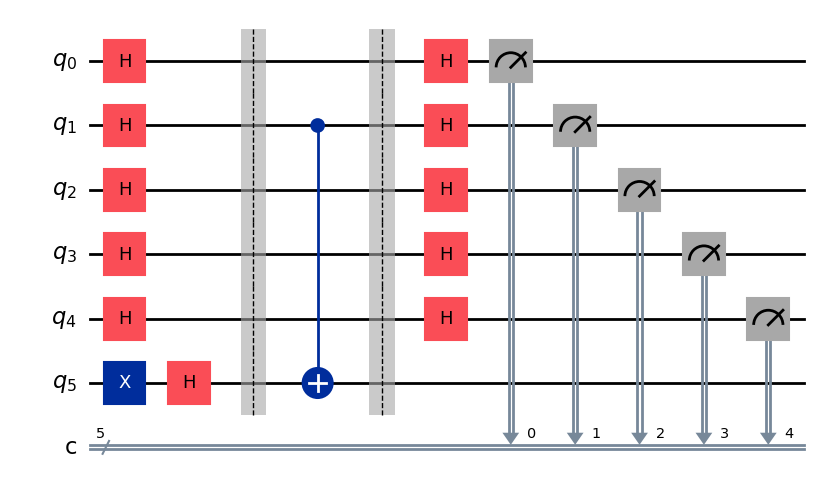

In [55]:
qc = QuantumCircuit(6,5)
qc.x(5)
qc.h([0, 1, 2, 3, 4, 5])

qc = deutsch_jozsa_oracle(qc, True)

qc.h([0, 1, 2, 3, 4])
qc.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
qc.draw('mpl')

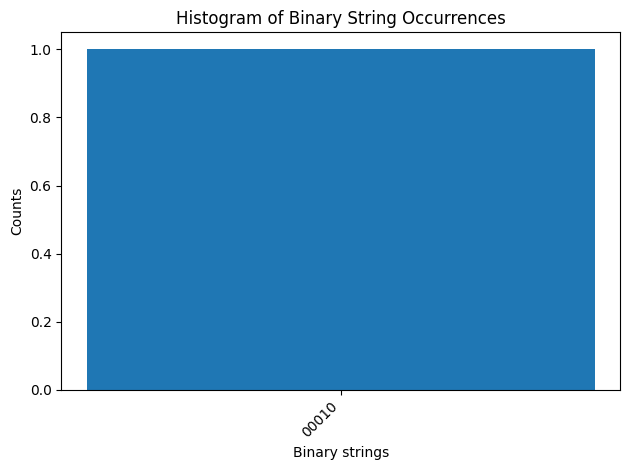

In [56]:
measurement_results = simulate_circuit(qc, 1)
plot_binary_histogram(measurement_results)